In [24]:
import numpy as np

# Potential energy function for a harmonic oscillator
def potential_energy(n, E0):
    return (0.5 + n) * E0

# Boltzmann distribution
def boltzmann_distribution(n, beta, E0):
    return np.exp(-beta * potential_energy(n, E0))

# Metropolis-Hastings algorithm for MCMC sampling
def metropolis_hastings(x0, n_samples, beta, E0):
    samples = [x0]
    x_current = x0
    n = 0
    while n < n_samples :
        # Propose a new sample from a Gaussian distribution centered at the current sample
        x_proposed = np.random.randint(0, 1e3)
        
        # Calculate the acceptance probability
        acceptance_prob = min(1, boltzmann_distribution(x_proposed, beta, E0) / boltzmann_distribution(x_current, beta, E0))
        
        # Accept or reject the proposed sample based on the acceptance probability
        if np.random.rand() < acceptance_prob:
            x_current = x_proposed
        
        samples.append(x_current)
        n += 1
    
    return samples

# Parameters
beta = 1.0  # Inverse temperature
E0 = 2.0   # Equilibrium position
x_initial = 2  # Initial position
n_samples = 1e5  # Number of samples to generate
step_size = 0.1    # Step size for proposing new samples

# Generate samples using Metropolis-Hastings algorithm
samples = metropolis_hastings(x_initial, n_samples, beta, E0)

# Calculate the expectation value of x
expectation_value = np.mean(samples)

print("Expectation value of the harmonic oscillator:", expectation_value)


Expectation value of the harmonic oscillator: 0.18807811921880782


In [ ]:
# Return stability of a given orbit

def HillDet (s, n) :
    

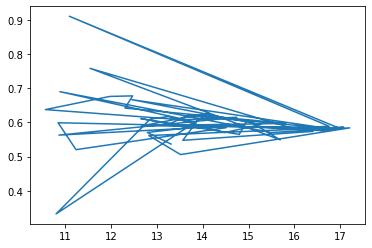

In [64]:
import matplotlib.pyplot as plt
random_numbers = np.random.uniform(4.5, 7.5, size = 50)
res = []

x = [int(10.0 ** r) for r in random_numbers]

for n in x :
    samples = metropolis_hastings(np.random.randint(0, 100), n, 1.0, 1.0)
    expectation_value = np.mean(samples)

    res.append(expectation_value)

plt.plot(np.log(x), res)


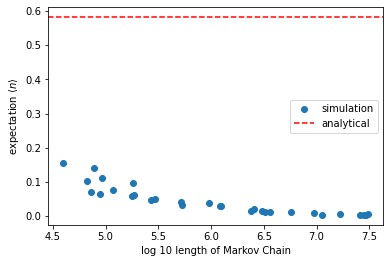

In [72]:
plt.scatter(np.log10(x), res, label = 'simulation')
plt.axhline(y=1/ (np.e - 1), color='r', linestyle='--', label = 'analytical')
plt.xlabel("log 10 length of Markov Chain")
plt.ylabel(r"expectation $\langle n \rangle$")
plt.legend()
plt.savefig('Fig1_for_MCMC.png')

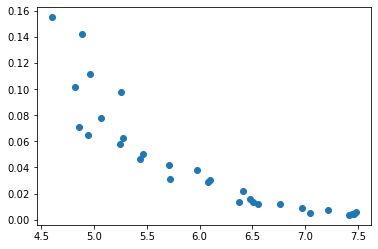

In [69]:
random_numbers = np.random.uniform(4.5, 7.5, size = 30)
res = []

x = [int(10.0 ** r) for r in random_numbers]

for n in x :
    tmp = []

    for _ in range (10) :
        samples = metropolis_hastings(np.random.randint(0, 100), n, 1.0, 1.0)
        expectation_value = np.mean(samples)
        tmp.append(expectation_value)

    res.append(np.std(np.array(tmp)))

plt.scatter(np.log10(x), res)


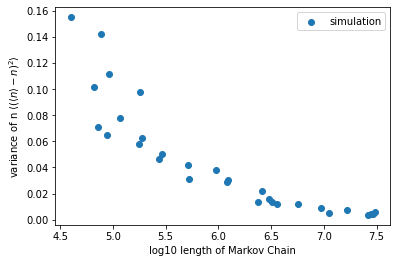

In [74]:
plt.scatter(np.log10(x), res, label = 'simulation')
plt.xlabel("log10 length of Markov Chain")
plt.ylabel(r"variance of n $\langle (\langle n \rangle- n)^2 \rangle$")
plt.legend()
plt.savefig('Fig2_for_MCMC.png')

In [45]:
res = []

samples = metropolis_hastings(np.random.randint(0, 100), 1e7, 1.0, 1.0)
expectation_value = np.mean(samples)

res.append(expectation_value)

#res.sort()

#x = np.linspace(min(res), max(res), 100)
#fig = [0]

# for i in range (len(x) - 1) :
#     for j in range (len(res)) :
#         if res[j] > x[i] :
#             tmp = j - fig[-1]
#             fig.append (tmp)
#             break

print ('Mean:', statistics.mean(samples))
print ('Standard deviation:', statistics.stdev(samples))

Mean: 0.5893910410608959
Standard deviation: 0.9645858520520469
